<a href="https://colab.research.google.com/github/dannnn30/data-mining-_-daniel/blob/main/Daniel_0706022210060_Week_6_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [ ]:
#Load dataset dan tampilkan
df = pd.read_csv("https://raw.githubusercontent.com/dannnn30/data-mining-_-daniel/refs/heads/main/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#describe dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#cek null value
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


In [ ]:
#encode
diagnosis_en = {'M' : 1, 'B' : 0}
df['diagnosis'] = df['diagnosis'].map(diagnosis_en)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


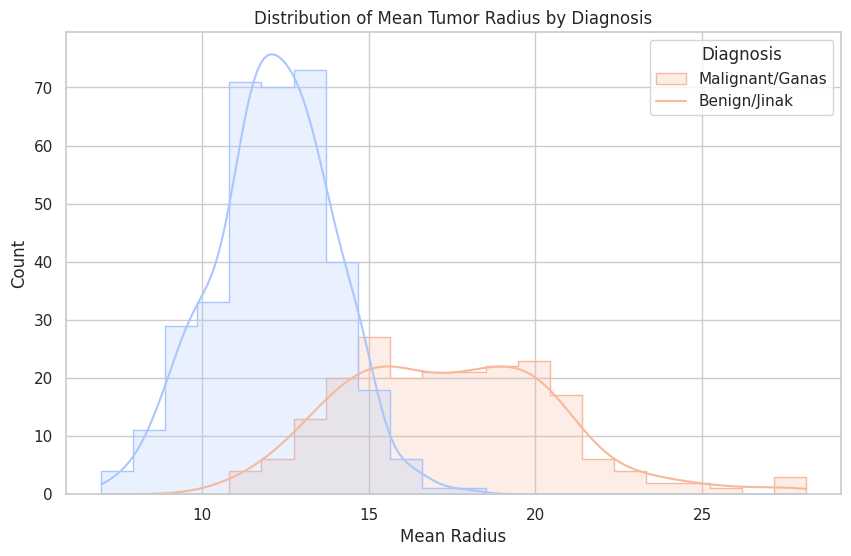

Histogram ini menunjukkan distribusi radius tumor untuk diagnosis jinak dan ganas.
Kasus ganas cenderung memiliki rata-rata radius yang lebih tinggi, sedangkan kasus jinak umumnya lebih rendah


In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df, x='radius_mean', hue='diagnosis', kde=True, element='step', palette='coolwarm')
plt.title('Distribution of Mean Tumor Radius by Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Count')
plt.legend(title='Diagnosis', labels=['Malignant/Ganas', 'Benign/Jinak'])
plt.show()

print('Histogram ini menunjukkan distribusi radius tumor untuk diagnosis jinak dan ganas.\nKasus ganas cenderung memiliki rata-rata radius yang lebih tinggi, sedangkan kasus jinak umumnya lebih rendah')

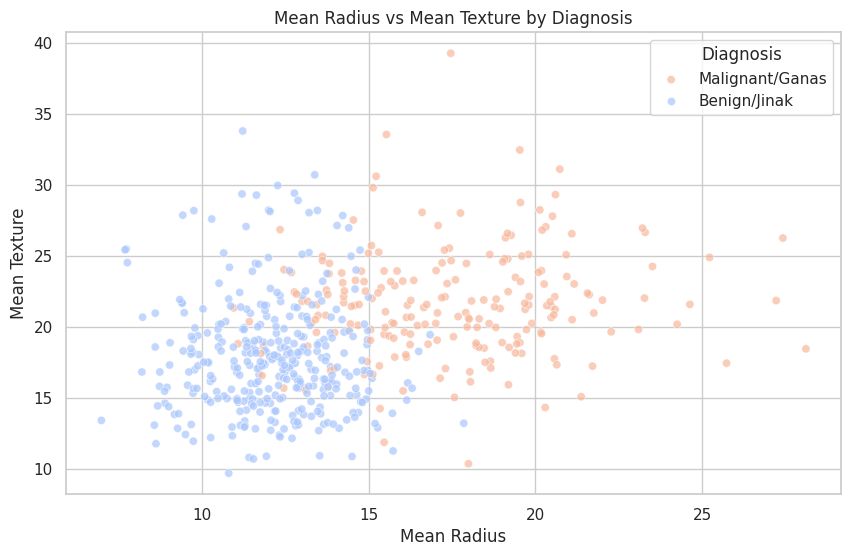

Scatter plot ini menunjukkan hubungan antara radius rata-rata dan tekstur rata-rata untuk diagnosis tumor jinak dan ganas


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis', palette='coolwarm', alpha=0.7)
plt.title('Mean Radius vs Mean Texture by Diagnosis')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(title='Diagnosis', labels=['Malignant/Ganas', 'Benign/Jinak'])
plt.show()

print('Scatter plot ini menunjukkan hubungan antara radius rata-rata dan tekstur rata-rata untuk diagnosis tumor jinak dan ganas')

In [ ]:
#mengeluarkan id karena tidak dipakai dalam pemodelan
df=df.drop(['id'], axis = 1)
df.head();

In [ ]:
#split X dan y
x = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

#kode ini digunakan untuk memisahkan variabel dependen dan independen, di mana variabel dependen adalah variabel y

In [ ]:
#train dan test data dengan test size 20% dan random state 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((455, 30), (114, 30))

In [ ]:
#entropy
clf_entro = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 0)
clf_entro.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_entro = clf_entro.predict(x_test)

In [ ]:
print('model accuracy score dengan criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_entro)))

model accuracy score dengan criterion entropy: 0.9561


In [ ]:
print('training set score: {0:0.4f}' .format(clf_entro.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_entro.score(x_test, y_test)))

training set score: 0.9802
test set score: 0.9561


[Text(0.5769230769230769, 0.875, 'x[7] <= 0.051\nentropy = 0.952\nsamples = 455\nvalue = [286, 169]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 16.83\nentropy = 0.314\nsamples = 282\nvalue = [266, 16]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[10] <= 0.626\nentropy = 0.136\nsamples = 263\nvalue = [258, 5]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.091\nsamples = 260\nvalue = [257, 3]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'x[1] <= 16.19\nentropy = 0.982\nsamples = 19\nvalue = [8, 11]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.619\nsamples = 13\nvalue = [2, 11]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 114.45\nentropy = 0.517\nsamples = 173\nvalue = [20, 153]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[21] <= 25.655\nentropy = 0.99

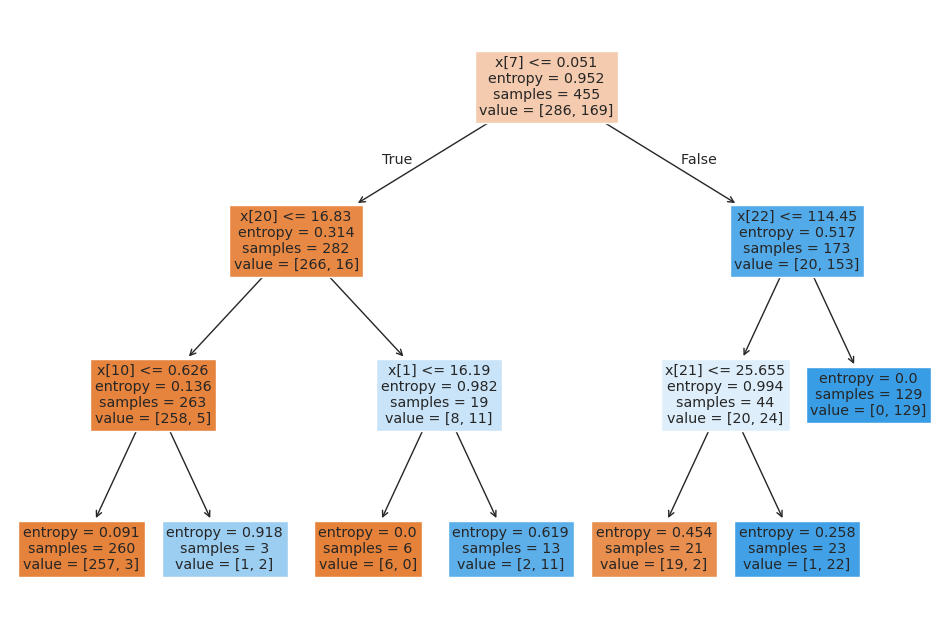

In [ ]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_entro.fit(x_train, y_train), filled = True)
#print decison tree nya

In [ ]:
#gini
clf_gini = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state = 0)
clf_gini.fit(x_train, y_train)
#kode ini menunjukkan model klasifikasi decision tree

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(x_test)

In [ ]:
print('model accuracy score dengan criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

model accuracy score dengan criterion gini: 0.9386


In [ ]:
print('training set score: {0:0.4f}' .format(clf_gini.score(x_train, y_train)))
print('test set score: {0:0.4f}' .format(clf_gini.score(x_test, y_test)))

training set score: 0.9780
test set score: 0.9386


[Text(0.5, 0.875, 'x[7] <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]'),
 Text(0.25, 0.625, 'x[20] <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[10] <= 0.626\ngini = 0.037\nsamples = 263\nvalue = [258, 5]'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 260\nvalue = [257, 3]'),
 Text(0.1875, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.375, 0.375, 'x[1] <= 16.19\ngini = 0.488\nsamples = 19\nvalue = [8, 11]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.4375, 0.125, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(0.75, 0.625, 'x[27] <= 0.147\ngini = 0.204\nsamples = 173\nvalue = [20, 153]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[22] <= 115.25\ngini = 0.5\nsamples = 35\nvalue = [18, 17]'),
 Text(0.5625, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.875, 0.375, 'x

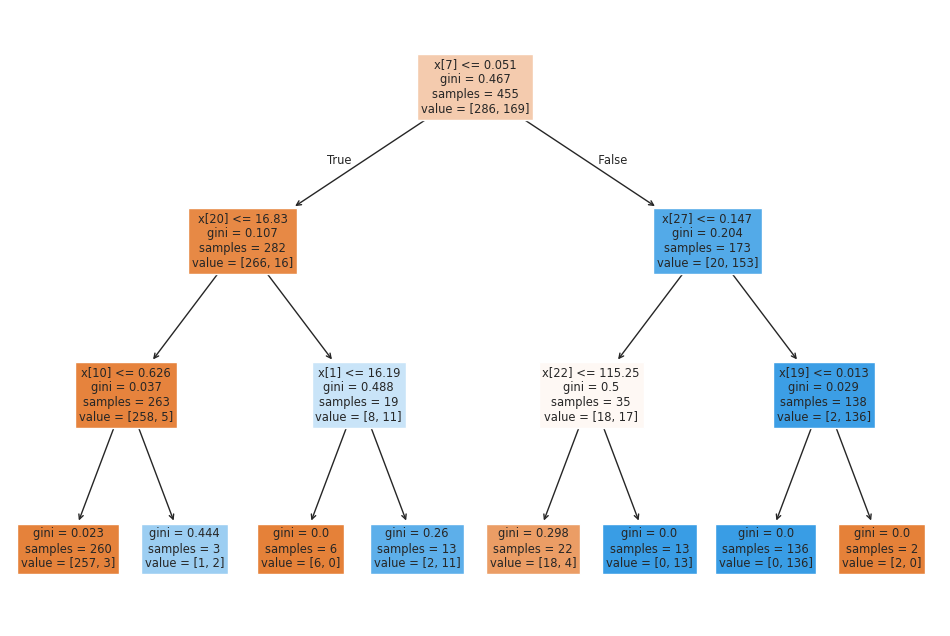

In [ ]:
plt.figure(figsize = (12,8))
tree.plot_tree(clf_gini.fit(x_train, y_train), filled = True)
#print decison tree nya

In [ ]:
#naive bays
x_train = x_train.dropna()
y_train = y_train[x_train.index]

nb_classifier = GaussianNB()
nb_classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
nb_y_pred = nb_classifier.predict(x_test)

In [ ]:
print('accuracy score dengan GaussianNB: {0:0.1f}'.format(accuracy_score(y_test, nb_y_pred)))

accuracy score dengan GaussianNB: 1.0


In [ ]:
gaus = confusion_matrix(y_test, nb_y_pred)
print('Confusion matrix GaussianNB: \n', gaus)

Confusion matrix GaussianNB: 
 [[71  0]
 [ 3 40]]


In [ ]:
#classification report GaussianNB
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
print("Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,97 / 97%.")

Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,97 / 97%.


In [ ]:
#logistic regression
classifier = LogisticRegression(max_iter=200)
classifier.fit(x_train, y_train)
#train model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [ ]:
y_pred_log = classifier.predict(x_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat prediksi dataframe perbandingan dan juga menampilkan 5 row pertama

     y_test  y_pred
204       0       0
70        1       1
131       1       1
431       0       0
540       0       0


In [ ]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))

Accuracy Score: 0.9561


In [ ]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#menampilkan confusion matrix

Confusion Matrix:
 [[70  1]
 [ 4 39]]


In [ ]:
print (classification_report (y_test, y_pred_log))
#menampilkan classification report

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [2]:
print("Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,96 / 96%.")

Dari laporan tersebut, dapat disimpulkan bahwa skor akurasi adalah 0,96 / 96%.
